In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

#### commodity markets
https://blog.quandl.com/api-for-commodity-data

#### understanding the data structure hierachy
database
- CHRIS_metadata.csv
    - contains all 600 futures from all markets
    - ~4000 rows ~8 for each future
    
 
market
- we choose for example cme
- filter by desired market to get all cme 




- build datasets for each category
  - Farms and Fishery Prices
  - Grain
  - Metal Prices
- clean
  - nan cleaning
  - correct time
- merge to one big frame
- basic viz
- rolling methods
 -> create portfolios
 -> todo: market states

## Load list of Futures and apply Market Filter

In [2]:
path="./data/"
# load metadata about futures
chris_meta=pd.read_csv(path+"CHRIS_metadata.csv")

# Filter for market
EXCHANGE="CME"
chris_meta=chris_meta[chris_meta["code"].str.contains(EXCHANGE)]
chris_meta.head(100)

,code,name,description,refreshed_at,from_date,to_date
73,CME_0D1,Mini European 3.5% Fuel Oil Barges FOB Rdam (P...,Historical Futures Prices: Mini European 3.5% ...,2018-11-22 03:29:50,2014-02-18,2018-11-21
74,CME_0D2,Mini European 3.5% Fuel Oil Barges FOB Rdam (P...,Historical Futures Prices: Mini European 3.5% ...,2018-11-22 03:29:50,2014-02-18,2018-11-21
75,CME_0D3,Mini European 3.5% Fuel Oil Barges FOB Rdam (P...,Historical Futures Prices: Mini European 3.5% ...,2018-11-22 03:29:50,2014-02-18,2018-11-21
76,CME_0D4,Mini European 3.5% Fuel Oil Barges FOB Rdam (P...,Historical Futures Prices: Mini European 3.5% ...,2018-11-22 03:29:50,2014-02-18,2018-11-21
77,CME_0D5,Mini European 3.5% Fuel Oil Barges FOB Rdam (P...,Historical Futures Prices: Mini European 3.5% ...,2018-11-22 03:29:50,2014-02-18,2018-11-21
78,CME_0F1,Mini Singapore Fuel Oil 180 cst (Platts) Futur...,Historical Futures Prices: Mini Singapore Fuel...,2018-11-22 03:29:44,2014-02-18,2018-11-21
79,CME_0F2,Mini Singapore Fuel Oil 180 cst (Platts) Futur...,Historical Futures Prices: Mini Singapore Fuel...,2018-11-22 03:29:44,2014-02-18,2018-11-21
80,CME_1N1,"Singapore Mogas 92 Unleaded (Platts) Futures, ...",Historical Futures Prices: Singapore Mogas 92 ...,2018-11-22 03:29:49,2014-02-18,2018-11-21
81,CME_1N2,"Singapore Mogas 92 Unleaded (Platts) Futures, ...",Historical Futures Prices: Singapore Mogas 92 ...,2018-11-22 03:29:49,2014-02-18,2018-11-21
82,CME_1N3,"Singapore Mogas 92 Unleaded (Platts) Futures, ...",Historical Futures Prices: Singapore Mogas 92 ...,2018-11-22 03:29:49,2014-02-18,2018-11-21


## Apply Regex to get First Index
As we can see every future consists of multiple sub-codes 
We apply regex to only receive only one desired future (the first)

In [3]:
# apply regex to filter unique futures
regex_="\D*[0-9]*\D+(0|[2-9])*1$"
chris_meta = chris_meta[chris_meta["code"].str.match(regex_)]
futures_to_fetch=chris_meta["code"]
futures_to_fetch_list=futures_to_fetch.tolist()

In [4]:
print("Furutes count: ",len(futures_to_fetch_list))

Furutes count:  405


## Fetch from Quandl & Save to .csv
specify .x for desired column 

CHRIS/ + future + .column
- .0 Date
- .1 Open
- .2 High
- .3 Low
- .4 Last
- .5 Change
- .6 Settle
- .7 Volume
- .8 Previous Day Open Interest


-todo
- calc log returns


In [5]:
import quandl
API_KEY_JOE="16-3ue4hzwtKNj3DSFYY"
quandl.ApiConfig.api_key=API_KEY_JOE

#CHRIS/{EXCHANGE}_{CODE}{NUMBER}
CHRIS="CHRIS/"
COL_=".4"
time_range=["daily","weekly","monthly","quarterly","annual"]

def fetch_chris_from_quandl():
    sample_futures = futures_to_fetch_list[0:]
    sample_futures=[CHRIS + f + COL_ for f in sample_futures]
    df_commodities = quandl.get(sample_futures, collapse=time_range[0])
    return df_commodities

#fetch_chris_from_quandl = df_commodities.to_csv(path+EXCHANGE+"_commodities.csv")

## Loading

In [6]:
df_commodities = pd.read_csv(path+EXCHANGE+"_commodities.csv", index_col=0)
df_commodities.iloc[:,:]

,CHRIS/CME_0D1 - Last,CHRIS/CME_0F1 - Last,CHRIS/CME_1N1 - Last,CHRIS/CME_1NB1 - Last,CHRIS/CME_1R1 - Last,CHRIS/CME_1U1 - Last,CHRIS/CME_461 - Last,CHRIS/CME_471 - Last,CHRIS/CME_4L1 - Last,CHRIS/CME_4M1 - Last,...,CHRIS/CME_YC1 - Last,CHRIS/CME_YH1 - Last,CHRIS/CME_YK1 - Last,CHRIS/CME_YM1 - Last,CHRIS/CME_YW1 - Last,CHRIS/CME_YX1 - Last,CHRIS/CME_Z1 - Last,CHRIS/CME_Z91 - Last,CHRIS/CME_Z921 - Last,CHRIS/CME_Z931 - Last
Date,,,,,,,,,,,,,,,,,,,,,
1959-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plotting NaN Values

In [7]:
def get_Total_NaN_of_df(df):
    return df.isna().sum().sum()

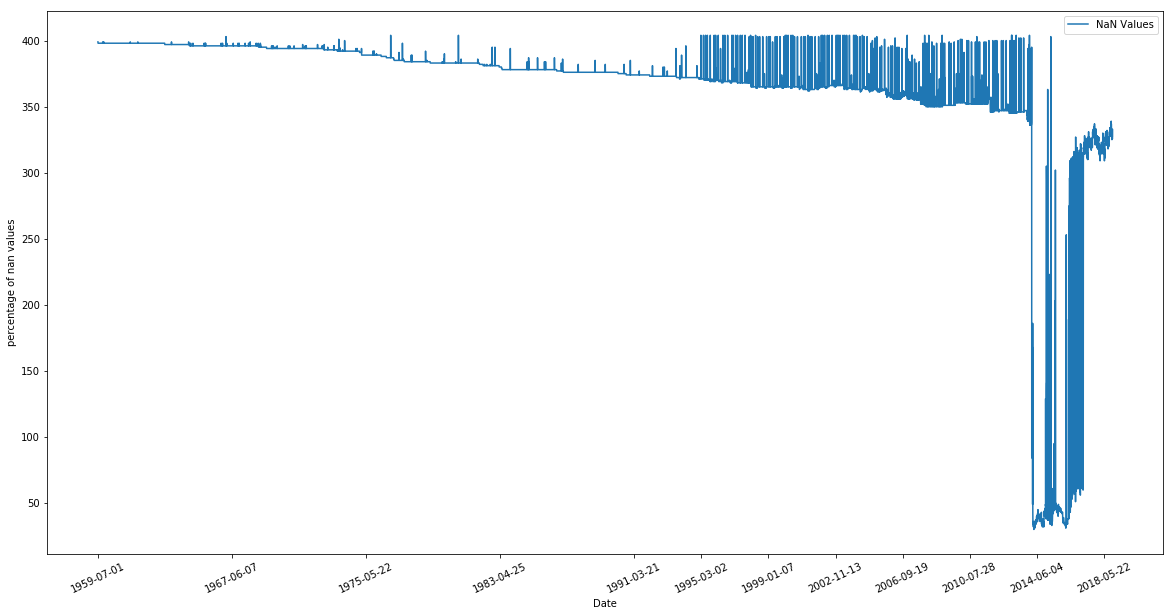

NaNs in df:  5462276


In [8]:
def missingValues(df, from_=0, percentage=False):
    # nan percentage
    if percentage:
        count_nulls = df.isnull().sum(axis=1)/len(df.columns)
    else:
        count_nulls = df.isnull().sum(axis=1)
    plt.figure(figsize=((20,10)));
    plt.xticks([0,2000,4000,6000,8000,9000,10000,11000,12000,13000,14000,15000])
    count_nulls[from_:].plot(subplots=True, label='NaN Values')
    plt.legend()
    plt.xticks(rotation=25)
    plt.ylabel('percentage of nan values')
    plt.show()
    print("NaNs in df: ", get_Total_NaN_of_df(df))

missingValues(df_commodities, 0, percentage=False)

In [19]:
# choose df wil less nans -> from 12k has lowest nans
filtered_df = df_commodities[13920:]

In [18]:
# returns df without nan values for a specific asset
def find_biggest_full_frame(asset_, df):
    # filter only rows that are not null
    target_asset_notnull = df[asset_].notnull()
    # apply filter
    df_w_clean_target = df[target_asset_notnull]
    # define maximum allowed nan values per asset
    nan_count_tresh = 0
    # filter only rows that have less than the nan_count_tresh nan's
    mask_mean_nan_cols = df_w_clean_target.isnull().sum(axis=0) <= nan_count_tresh
    # apply filter on dataframe
    df_w_clean_target = df_w_clean_target.loc[:, (df_w_clean_target.isnull().sum(axis=0) <= mask_mean_nan_cols)]
    return df_w_clean_target


# choose a prefered stock in which we measure
asset_="CHRIS/CME_AD1 - Last"

#df_new = find_biggest_full_frame(asset_)
#print(get_Total_NaN_of_df(df_new))
#df_new.shape

for commodity_ in filtered_df.columns:
    xx = find_biggest_full_frame(commodity_, filtered_df)
    print(commodity_, " has data for: " ,xx.shape[0], " days and ", xx.shape[1], " commodities")

CHRIS/CME_0D1 - Last  has data for:  643  days and  47  commodities
CHRIS/CME_0F1 - Last  has data for:  635  days and  41  commodities
CHRIS/CME_1N1 - Last  has data for:  647  days and  30  commodities
CHRIS/CME_1NB1 - Last  has data for:  631  days and  37  commodities
CHRIS/CME_1R1 - Last  has data for:  639  days and  33  commodities
CHRIS/CME_1U1 - Last  has data for:  390  days and  119  commodities
CHRIS/CME_461 - Last  has data for:  649  days and  29  commodities
CHRIS/CME_471 - Last  has data for:  474  days and  49  commodities
CHRIS/CME_4L1 - Last  has data for:  647  days and  37  commodities
CHRIS/CME_4M1 - Last  has data for:  634  days and  30  commodities
CHRIS/CME_4N1 - Last  has data for:  448  days and  178  commodities
CHRIS/CME_4P1 - Last  has data for:  651  days and  26  commodities
CHRIS/CME_581 - Last  has data for:  647  days and  39  commodities
CHRIS/CME_5C1 - Last  has data for:  631  days and  50  commodities
CHRIS/CME_5Z1 - Last  has data for:  661  day

CHRIS/CME_GE1 - Last  has data for:  633  days and  33  commodities
CHRIS/CME_GI1 - Last  has data for:  372  days and  35  commodities
CHRIS/CME_GL1 - Last  has data for:  544  days and  29  commodities
CHRIS/CME_GY1 - Last  has data for:  643  days and  37  commodities
CHRIS/CME_GY21 - Last  has data for:  547  days and  44  commodities
CHRIS/CME_GZ1 - Last  has data for:  640  days and  34  commodities
CHRIS/CME_H21 - Last  has data for:  642  days and  22  commodities
CHRIS/CME_H221 - Last  has data for:  639  days and  31  commodities
CHRIS/CME_H231 - Last  has data for:  640  days and  25  commodities
CHRIS/CME_H241 - Last  has data for:  640  days and  25  commodities
CHRIS/CME_H31 - Last  has data for:  639  days and  29  commodities
CHRIS/CME_H41 - Last  has data for:  641  days and  20  commodities
CHRIS/CME_H421 - Last  has data for:  639  days and  31  commodities
CHRIS/CME_H431 - Last  has data for:  640  days and  22  commodities
CHRIS/CME_H441 - Last  has data for:  533 

CHRIS/CME_NK1 - Last  has data for:  1201  days and  14  commodities
CHRIS/CME_NKN1 - Last  has data for:  629  days and  52  commodities
CHRIS/CME_NL1 - Last  has data for:  646  days and  31  commodities
CHRIS/CME_NN1 - Last  has data for:  783  days and  14  commodities
CHRIS/CME_NN21 - Last  has data for:  653  days and  18  commodities
CHRIS/CME_NN31 - Last  has data for:  651  days and  22  commodities
CHRIS/CME_NN41 - Last  has data for:  652  days and  21  commodities
CHRIS/CME_NN51 - Last  has data for:  652  days and  21  commodities
CHRIS/CME_NP1 - Last  has data for:  650  days and  22  commodities
CHRIS/CME_NP21 - Last  has data for:  649  days and  26  commodities
CHRIS/CME_NP31 - Last  has data for:  649  days and  26  commodities
CHRIS/CME_NP41 - Last  has data for:  649  days and  26  commodities
CHRIS/CME_NP51 - Last  has data for:  650  days and  18  commodities
CHRIS/CME_NQ1 - Last  has data for:  1208  days and  9  commodities
CHRIS/CME_NR1 - Last  has data for:  7

CHRIS/CME_XN1 - Last  has data for:  645  days and  42  commodities
CHRIS/CME_Y71 - Last  has data for:  170  days and  200  commodities
CHRIS/CME_YC1 - Last  has data for:  1157  days and  17  commodities
CHRIS/CME_YH1 - Last  has data for:  526  days and  118  commodities
CHRIS/CME_YK1 - Last  has data for:  1162  days and  20  commodities
CHRIS/CME_YM1 - Last  has data for:  1207  days and  9  commodities
CHRIS/CME_YW1 - Last  has data for:  1132  days and  18  commodities
CHRIS/CME_YX1 - Last  has data for:  644  days and  40  commodities
CHRIS/CME_Z1 - Last  has data for:  1194  days and  19  commodities
CHRIS/CME_Z91 - Last  has data for:  638  days and  31  commodities
CHRIS/CME_Z921 - Last  has data for:  645  days and  27  commodities
CHRIS/CME_Z931 - Last  has data for:  645  days and  27  commodities


## Select one Sample Future & Plot

In [ ]:
# comma error
future_ = "CHRIS/CME_YW1 - Last"
sel = df_commodities[df_commodities[future_].notnull()]

fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(sel[future_])
plt.show()

In [43]:
#one null value!!!

### ###

#dont drop any columns because they are considered to be duplicates 
#example wheat_A wheat_X -> are still independent and different
# clustering algorithms
## clip eigenvalues to sort if necessary
## rolling
# louvre 
# k means + cross validatiion!

In [ ]:
## OLD
'''
A_COMMODITIES_Vegetable_Oil_Prices=["ODA/PROIL_USD","ODA/PSUNO_USD","ODA/POLVOIL_USD","ODA/PPOIL_USD"]

B_COMMODITIES_Forestry_Prices=["ODA/PLOGSK_USD","ODA/PLOGORE_USD","ODA/PSAWORE_USD","ODA/PSAWMAL_USD","CHRIS/CME_LB1","ODA/PRUBB_USD"]

C_COMMODITIES_Textiles_and_Fibres_Prices=["ODA/PCOTTIND_USD","CHRIS/ICE_CT1"]

D_COMMODITIES_METAL=["LBMA/GOLD", "WIKI/AAPL", "BUNDESBANK/BBK01_WT5511"]

E_COMMODITIES_GRAIN=["CHRIS/CME_C1", "CHRIS/CME_O1", "CHRIS/CME_RR1", "CHRIS/CME_S1",
                   "CHRIS/CME_SM1", "CHRIS/CME_BO1", "CHRIS/CME_W1"]

A_COMMODITIES_Vegetable_Oil_Prices=A_COMMODITIES_Vegetable_Oil_Prices
B_COMMODITIES_Forestry_Prices=B_COMMODITIES_Forestry_Prices
C_COMMODITIES_Textiles_and_Fibres_Prices=C_COMMODITIES_Textiles_and_Fibres_Prices
E_COMMODITIES_GRAIN=[s + col_ for s in E_COMMODITIES_GRAIN]
'''

In [ ]:
import pandas as pd
#download tick data for AAPL stock
data = pd.read_csv("http://www.google.com/finance/getprices?q=AAPL&i=300&p=10d&f=d,o,h,l,c,v", skiprows=8, header=None)


In [33]:
API_KEY_BARCHART = "1c859db4fd9c02e8a17a59caa89f4fca"

def construct_barChart_url(sym, start_date, freq, api_key=API_KEY_BARCHART):
    '''Function to construct barchart api url'''
    
    url = 'http://marketdata.websol.barchart.com/getHistory.csv?' +\
            'key={}&symbol={}&type={}&startDate={}'.format(API_KEY_BARCHART, sym, freq, start_date)
    return url

In [44]:
yyyymmdd="20110101"
hhmmss='000000'
start = yyyymmdd+hhmmss
freq = 'minutes'

url = construct_barChart_url("AMZN", "cool", freq, API_KEY_BARCHART)
print(url)

http://marketdata.websol.barchart.com/getHistory.csv?key=1c859db4fd9c02e8a17a59caa89f4fca&symbol=AMZN&type=minutes&startDate=cool


In [45]:
import ondemand
od = ondemand.OnDemandClient(api_key=API_KEY_BARCHART, end_point='https://marketdata.websol.barchart.com/')
quotes = od.quote('AAPL,MSFT')['results']
quotes

Barchart OnDemand Client: https://marketdata.websol.barchart.com/


[{'symbol': 'AAPL',
  'exchange': 'BATS',
  'name': 'Apple Inc',
  'dayCode': 'Q',
  'serverTimestamp': '2018-11-27T10:55:38-06:00',
  'mode': 'i',
  'lastPrice': 173.87,
  'tradeTimestamp': '2018-11-27T11:40:38-06:00',
  'netChange': -0.75,
  'percentChange': -0.43,
  'unitCode': '2',
  'open': 171.8,
  'high': 174.77,
  'low': 170.88,
  'close': 0,
  'flag': '',
  'volume': 1093129},
 {'symbol': 'MSFT',
  'exchange': 'BATS',
  'name': 'Microsoft Corp',
  'dayCode': 'Q',
  'serverTimestamp': '2018-11-27T10:55:39-06:00',
  'mode': 'i',
  'lastPrice': 106.75,
  'tradeTimestamp': '2018-11-27T11:40:36-06:00',
  'netChange': 0.28,
  'percentChange': 0.26,
  'unitCode': '2',
  'open': 106.24,
  'high': 107.17,
  'low': 105.36,
  'close': 0,
  'flag': '',
  'volume': 1713206}]